In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras
import tensorflow as tf

In [3]:
from google.colab import files


uploaded = files.upload()

Saving ipl_data.csv to ipl_data.csv


In [4]:
ipl = pd.read_csv("ipl_data.csv")
ipl.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
ipl.isnull().sum()

,0
mid,0
date,0
venue,0
bat_team,0
bowl_team,0
batsman,0
bowler,0
runs,0
wickets,0
overs,0


In [8]:
ipl.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [5]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [10]:
df.head(3)

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [6]:
x = df.drop(['total'], axis = 1)
y = df['total']

In [11]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
x['venue'] = venue_encoder.fit_transform(x['venue'])
x['bat_team'] = batting_team_encoder.fit_transform(x['bat_team'])
x['bowl_team'] = bowling_team_encoder.fit_transform(x['bowl_team'])
x['batsman'] = striker_encoder.fit_transform(x['batsman'])
x['bowler'] = bowler_encoder.fit_transform(x['bowler'])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [16]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape = (x_train_s.shape[1], )),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [17]:
# Train the model
model.fit(x_train_s, y_train, epochs=50, batch_size=64, validation_data=(x_test_s, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 56.3151 - val_loss: 22.0489
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 22.1934 - val_loss: 22.0047
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.2737 - val_loss: 21.9934
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 22.2623 - val_loss: 21.9180
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 22.1727 - val_loss: 21.9213
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2079 - val_loss: 21.9167
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 22.1781 - val_loss: 21.8957
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.2107 - val_loss: 22.0394
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1187 - val_loss: 22.4929
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.2225 - val_loss: 21.8680
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 21.9329 - val_loss: 22.0825
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

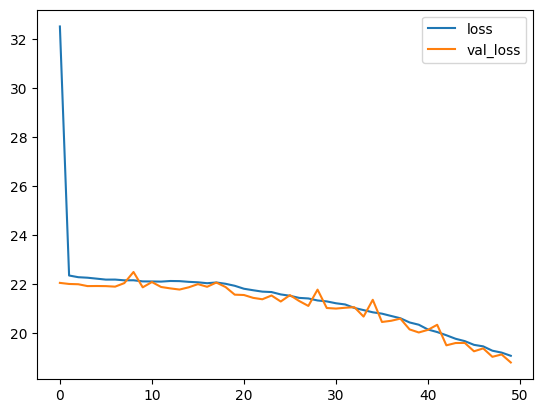

In [18]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [20]:
# Make predictions
predictions = model.predict(x_test_s)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


19.294599533081055

In [21]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [23]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', index=3, options=('M Chinnaswamy Stadium', 'Punjab Cricket Association S…

Dropdown(description='Select Batting Team:', index=3, options=('Kolkata Knight Riders', 'Chennai Super Kings',…

Dropdown(description='Select Batting Team:', index=10, options=('Royal Challengers Bangalore', 'Kings XI Punja…

Dropdown(description='Select Striker:', index=126, options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hus…

Dropdown(description='Select Bowler:', index=197, options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB …

Button(description='Predict Score', style=ButtonStyle())

Output()